# Duffing Oscillator Solution

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin

In [8]:
# Test that all is working. 
# f_tol adjust accuracy. This is more then reasonable, but illustrative. 
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, sp.array([[0,1,-1]]), .7, f_tol = 1e-16)
print('Equation errors (should be zero): ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[ -2.77555756e-17   0.00000000e+00   0.00000000e+00]]
Constant term of FFT of signal should be zero:  (-0.107710534581+0j)


In [9]:
# Test that all is working. 
# f_tol adjust accuracy. This is more then reasonable, but illustrative. 
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, x0 = x, omega = .7, num_harmonics= 5, f_tol = 1e-16)
print('Equation errors (should be zero): ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

NoConvergence: [[-0.3568271   0.58966331  1.20212862  1.40781054  1.27311023  0.76938617
  -0.12852479 -0.95222185 -1.34985701 -1.3822554  -1.07289236]]

In [27]:
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, x0 = sp.array([[0,1,1,-1,-1]]), 
                                 num_harmonics = 15, omega = .2, f_tol = 1e-12)
print('Equation errors (should be zero): ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[  7.19910243e-17   2.25514052e-17   8.67361738e-18  -7.11236625e-16
   -6.27969898e-16   6.38378239e-16   4.16333634e-17  -3.01147995e-15
   -5.48172618e-16  -2.42861287e-16  -1.05471187e-15   1.94289029e-16
    1.90819582e-16  -5.06539255e-16   3.12250226e-16  -3.53016227e-16
   -1.43114687e-16  -8.67361738e-18   2.04697370e-16  -2.42861287e-16
    1.31838984e-16   2.65759637e-15  -1.66533454e-16   1.70696790e-15
    1.93595140e-15   1.08246745e-15  -7.63278329e-16   1.04083409e-15
    1.26981758e-15  -7.28583860e-17  -7.97972799e-17]]
Constant term of FFT of signal should be zero:  (-1.85962356625e-14+0j)


In [26]:
x.shape

(1, 31)

Sometimes we can improve just by restarting from the prior end point. Sometimes, we just think it's improved. 

In [47]:
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, x, .7, f_tol = 1e-14)
print('Errors: ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Errors:  [[  2.77555756e-17   0.00000000e+00   0.00000000e+00]]
Constant term of FFT of signal should be zero:  (-0.107710534581+0j)


/Users/jslater/anaconda/lib/python3.6/site-packages/scipy/optimize/nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


In [48]:
# Adding more harmonics will improve the zero frequency term accuracy. Longish story here. 
t, x, e, amps, phases = ms.hb_so(ms.duff_osc, sp.array([[0,1,-1,0,0,0,0]]), .001, f_tol = 1e-14)
print('Errors: ',e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Errors:  [[  4.22447084e-20   6.35471646e-17   5.71806532e-17   1.80656246e-18
    9.07976968e-18   6.28548210e-17  -2.77609755e-17]]
Constant term of FFT of signal should be zero:  (-7.21435334228e-07+0j)


The average for this problem is known to be zero, we got -1.03062190591e-07


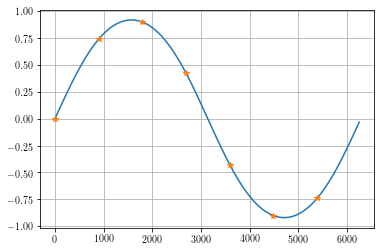

In [49]:
# Let's get a smoother response
time, xc = ms.time_history(t,x)
plt.plot(time,xc.T,t,x.T,'*')
plt.grid(True)
print('The average for this problem is known to be zero, we got', sp.average(x))

In [50]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return -x-.1*x**3-.1*v+1*sin(omega*t)

[[-0.18301653  0.89755789  1.38727516  1.33327431  0.72344894 -0.41327672
  -1.21777379 -1.42368095 -1.10589493]] [[  3.05234490e-09  -5.12549059e-10  -1.90306010e-08  -1.03661774e-07
   -1.52197536e-07   1.41372924e-09   3.25032445e-09   6.38679235e-07
    5.26556565e-08]]
Constant term of FFT of signal should be zero:  (-0.00208664413924+0j)


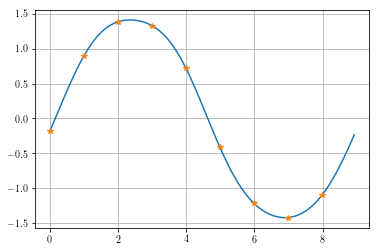

In [51]:
t, x, e, amps, phases = ms.hb_so(duff_osc2, sp.array([[0,1,-1,0,0,0,0,0,0]]), .7)
print(x,e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)
plt.plot(time,xc.T, t, x.T,'*')
plt.grid(True)

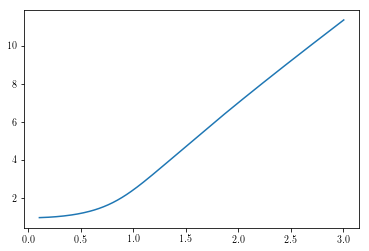

In [52]:
omega = sp.linspace(0.1,3,200)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq)#, f_tol = 1e-10)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

The break is an indicative of a break in the branch and is actually a result of the `solution` being unstable.  Not the system, but the solution. By that we mean that while this is considered a solution, it isn't one that will actually continue in a real situation and another solution will necessarily be found. 

A simple solution is to change the starting guess to be away from the solution and see if it finds another one. Indeed that happens. 



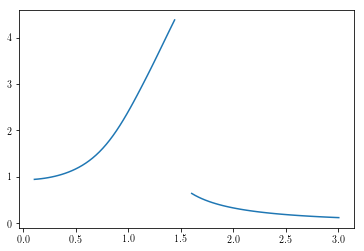

In [53]:
omega = sp.linspace(0.1,3,90)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1,0,0,0,0,0,0]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    #print(sp.average(x))
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, verbose = False, f_tol = 1e-6)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

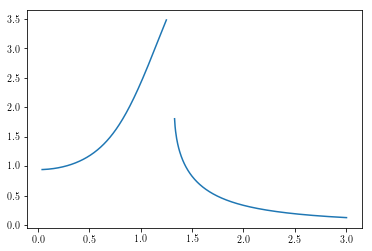

In [55]:
omegal = sp.arange(3,.03,-1/200)+1/200
ampl = sp.zeros_like(omegal)
x = sp.array([[0,-1,1,0,0,0,0]])
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_so(duff_osc2, x, freq, f_tol = 1e-6)#, callback = resid)
        ampl[i]=amps[0]
    except:
        ampl[i] = sp.nan
plt.plot(omegal, ampl)

In [56]:
x

array([[-0.00377912,  0.74011868,  0.90346255,  0.42998097, -0.42353567,
        -0.90213389, -0.74412809]])

In [57]:
sp.fftpack.fft(x)

array([[ -1.45696510e-05+0.j        ,  -1.23816100e-02-3.2910842j ,
         -6.54385041e-05+0.00369151j,  -7.72572122e-04-0.0644356j ,
         -7.72572122e-04+0.0644356j ,  -6.54385041e-05-0.00369151j,
         -1.23816100e-02+3.2910842j ]])

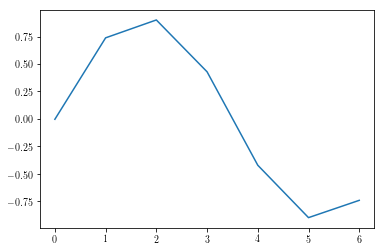

In [58]:
plt.plot(x.T)

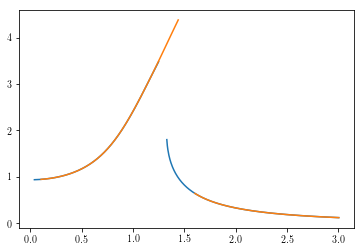

In [59]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)
#plt.axis([0,3, 0, 10.5])

In [60]:
from scipy.optimize import newton_krylov

In [61]:
def duff_amp_resid(a):
    return (mu**2+(sigma-3/8*alpha/omega_0*a**2)**2)*a**2-(k**2)/4/omega_0**2

In [62]:
mu = 0.05 # damping
k = 1 # excitation amplitude
sigma = -0.9 #detuning
omega_0 = 1 # driving frequency
alpha = 0.1 # cubic coefficient

In [63]:
newton_krylov(duff_amp_resid,-.1)

array(-0.5478691201747141)

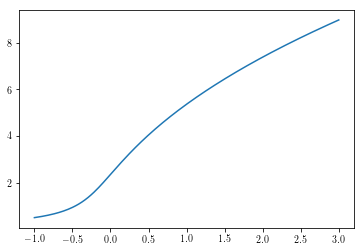

In [64]:
sigmas = sp.linspace(-1,3,200)
amplitudes = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,1)
for i, sigma in enumerate(sigmas):
    try:
        amplitudes[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudes[i]
    except:
        amplitudes[i] = newton_krylov(duff_amp_resid,0)
        x = amplitudes[i]

plt.plot(sigmas,amplitudes)

/Users/jslater/anaconda/lib/python3.6/site-packages/scipy/optimize/nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


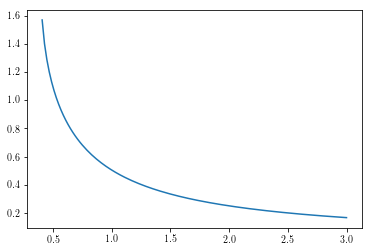

In [65]:
sigmas = sp.linspace(-1,3,200)
sigmasr = sigmas[::-1]
amplitudesr = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,3)
for i, sigma in enumerate(sigmasr):
    try:
        amplitudesr[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudesr[i]
    except:
        amplitudesr[i] = sp.nan#newton_krylov(duff_amp_resid,0)
        x = amplitudesr[i]
        

plt.plot(sigmasr,amplitudesr)

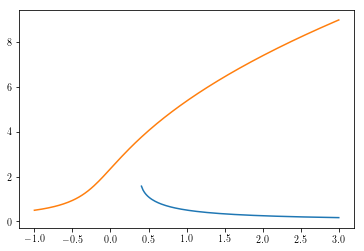

In [66]:
plt.plot(sigmasr,amplitudesr)
plt.plot(sigmas,amplitudes)